In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.optimize import curve_fit
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt;
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import itertools
from statsmodels.tsa.stattools import kpss
plt.rcdefaults()
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [39]:
df_uah1 = pd.read_excel("/Users/Marta/Desktop/diploma/Data_1_S.xlsx", "quantity")
df_uah1 = df_uah1.set_index(["Period"])
df_uah1["Total 1"] = df_uah1["T1"] +df_uah1["T2"] +df_uah1["T3"] +df_uah1["T4"]
df_uah1["Total 2"] = df_uah1[[c for c in df_uah1.columns if "P" in c]].sum(axis=1)
df_uah1["Total"] = df_uah1["Total 1"] + df_uah1["Total 2"]
train_part = 0.9
df_uah2 = df_uah1.iloc[:int(len(df_uah1)*train_part)]

,T1,T2,T3,T4,Total 1,P1,P2,P3,P4,P5,...,P40,P41,P42,P43,P44,P45,P46,P47,Total 2,Total
Period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,8329455.28,1.114613e+08,7558521.0,0.0,1.273493e+08,24570995.42,8392962.1,2948832.02,2378457.36,2121772.8,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.992934e+07,2.272786e+08
2012-02-01,8422206.08,1.070589e+08,7679168.8,0.0,1.231603e+08,24178178.06,8310921.0,2744813.10,2167993.08,1995142.7,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.568384e+07,2.188441e+08
2012-03-01,9973766.42,1.213382e+08,8969418.2,0.0,1.402814e+08,26081116.70,10499161.5,2897903.28,2376359.88,1923666.7,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.080389e+08,2.483203e+08
2012-04-01,9565933.62,1.153872e+08,8678877.5,0.0,1.336321e+08,26320578.72,9263805.7,3175028.96,2583360.24,2080522.6,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.026014e+08,2.362335e+08
2012-05-01,9280618.84,1.172806e+08,8466738.8,0.0,1.350280e+08,29584472.70,9599399.9,3483262.90,2743544.52,2269272.2,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.046363e+08,2.396643e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,10002560.40,1.040315e+08,9466721.8,535838.6,1.240367e+08,18028987.38,24200579.9,1365278.02,829830.24,5542320.2,...,1655663.16,97023.6,24250.2,128578.8,705193.8,423800.6,109999.4,30265.48,9.402894e+07,2.180656e+08
2022-09-01,11223629.10,1.008038e+08,10609073.8,614555.3,1.232511e+08,16713785.68,13297880.6,1261040.30,765239.24,5280359.4,...,1638145.44,133669.6,24711.6,138354.8,760021.2,520696.0,121697.6,46916.36,8.958011e+07,2.128312e+08
2022-10-01,10628843.10,9.494163e+07,9958934.6,669908.5,1.161993e+08,17435543.16,7386391.0,1310334.42,807964.04,5528606.2,...,1691747.40,194233.8,25848.6,155861.0,751282.8,733280.6,120359.4,41418.56,8.431279e+07,2.005121e+08


In [60]:
def predict_smoothing(y, i, x=None, prediction_len=30, var_name=None, trend="add", seas="add", damped_trend=False):

    try:
        fit1 = ExponentialSmoothing(
            y,
            seasonal_periods=12,
            trend=trend,
            seasonal=seas,
            use_boxcox=True,
            damped_trend=damped_trend,
            initialization_method="estimated",
        ).fit()

        params = [
            "smoothing_level",
            "smoothing_trend",
            "damping_trend",
            "smoothing_seasonal",
            "initial_level",
            "initial_trend",
        ]
        ax = y.plot(
            figsize=(10, 6),
            marker="o",
            color="black",
            title="Forecasts from Holt-Winters' method",
        )
        ax.set_ylabel("series")
        ax.set_xlabel("Year")
        fit1.fittedvalues.plot(ax=ax, style="--", color="yellow")

        preds_fit1 = fit1.forecast(prediction_len).clip(lower=1, upper=400000000)
        preds_fit1.rename(f"Holt-Winters ({trend}-{seas}-seasonal)").plot(
            ax=ax, style="--", marker="o", color="yellow", legend=True)
        plt.show()

        mse_train, mape_train = np.sqrt(mse(fit1.fittedvalues.fillna(1), y)), mape(fit1.fittedvalues.fillna(1), y)
        mse_test, mape_test = np.sqrt(mse(preds_fit1.fillna(1), df_uah1[var_name].iloc[-prediction_len:])), mape(preds_fit1.fillna(1),  df_uah1[var_name].iloc[-prediction_len:])

        print(var_name, trend, seas, damped_trend, mse_train, mape_train, mse_test, mape_test)
        scores.loc[i, :] = [var_name, trend, seas, damped_trend, 
                            mse_train, mape_train, mse_test, mape_test, train_part]

        plt.show()
        print("Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.")
    except Exception as e:
        print(e, list(y))


In [63]:
scores = pd.DataFrame(columns=["Series", "Trend", "Seasonal", "Damped trend",
                               "RMSE_train", "MAPE_train", "RMSE_test", "MAPE_test", "Cross validation sample"])
df_uah1 = df_uah1.astype(np.float64)
df_uah2[var_] = df_uah2[var_].replace(np.inf, df_uah2[var_].mean())
df_uah2[var_]


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


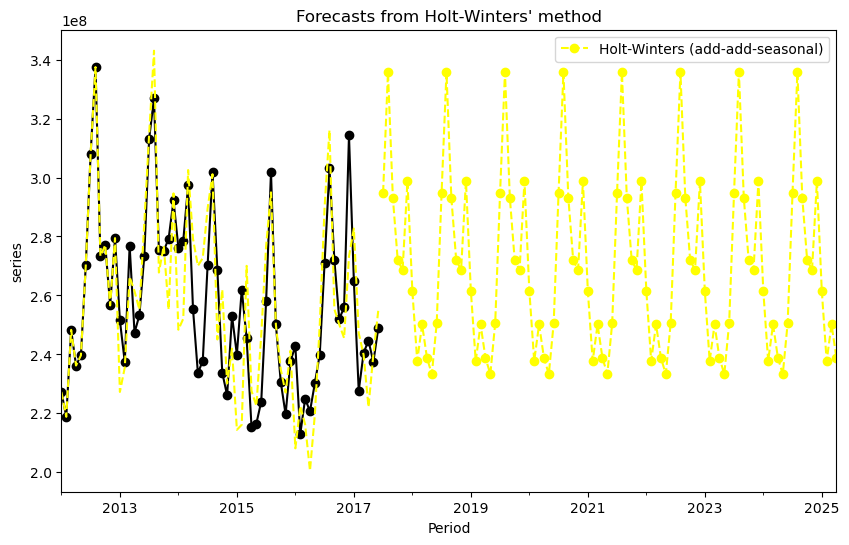

Total add add False 16861389.017980516 0.04851287269362607 54278602.18763365 0.14984559121782082
Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


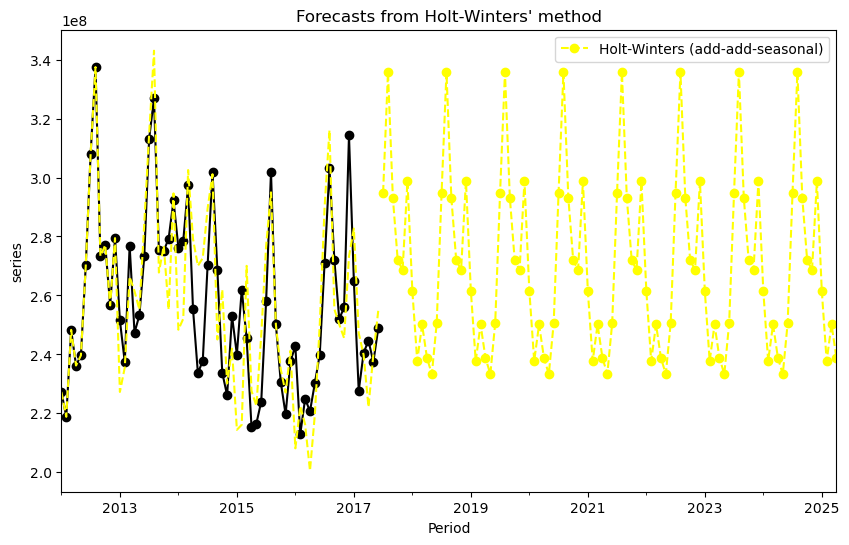

Total add add True 16861389.017980516 0.04851287269362607 54278602.18763365 0.14984559121782082
Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


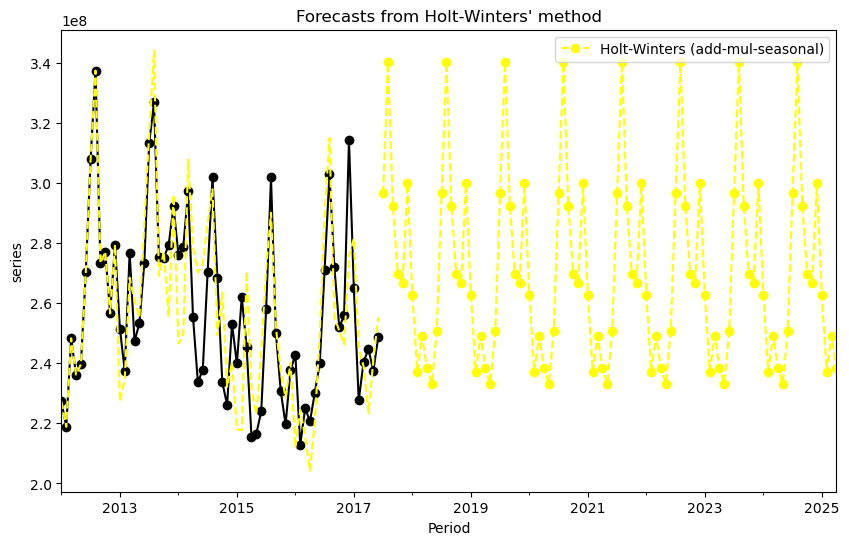

Total add mul False 16473694.35993847 0.04823514747577167 54936793.058544055 0.1503263794295345
Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


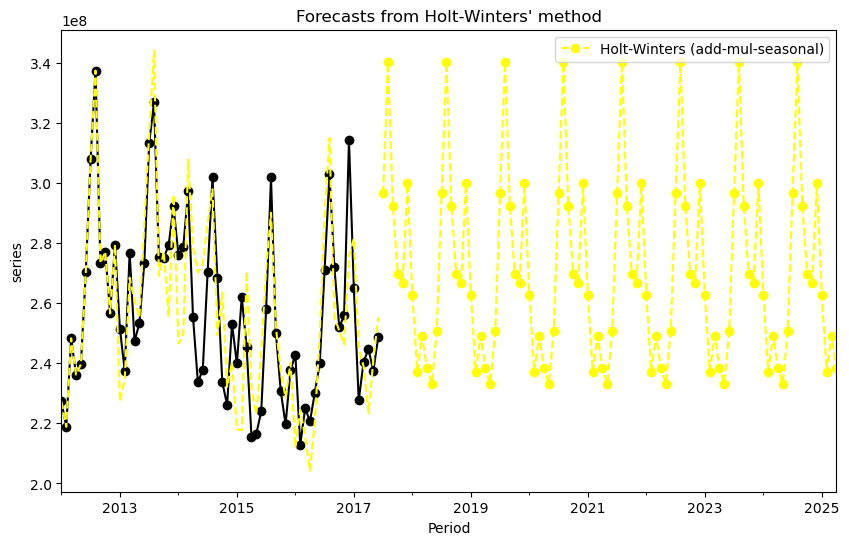

Total add mul True 16473694.35993847 0.04823514747577167 54936793.058544055 0.1503263794295345
Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


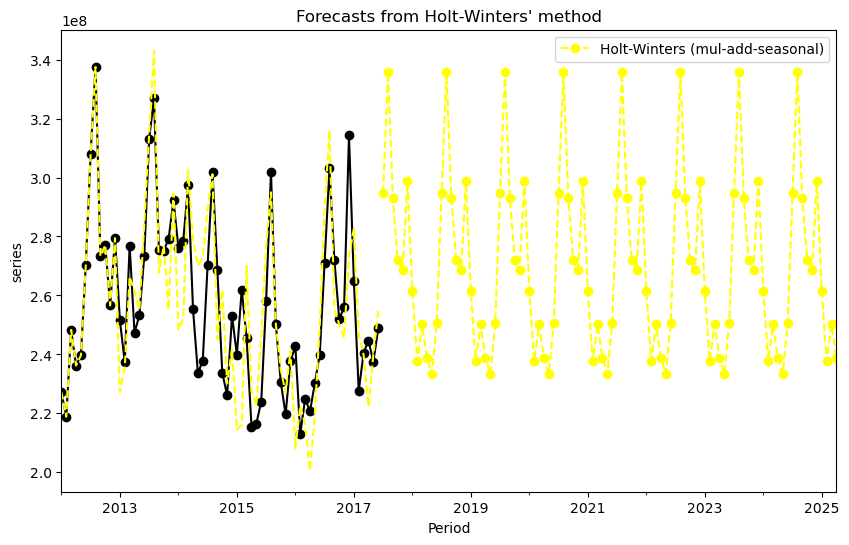

Total mul add False 16861389.017980516 0.04851287269362607 54278602.18763365 0.14984559121782082
Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


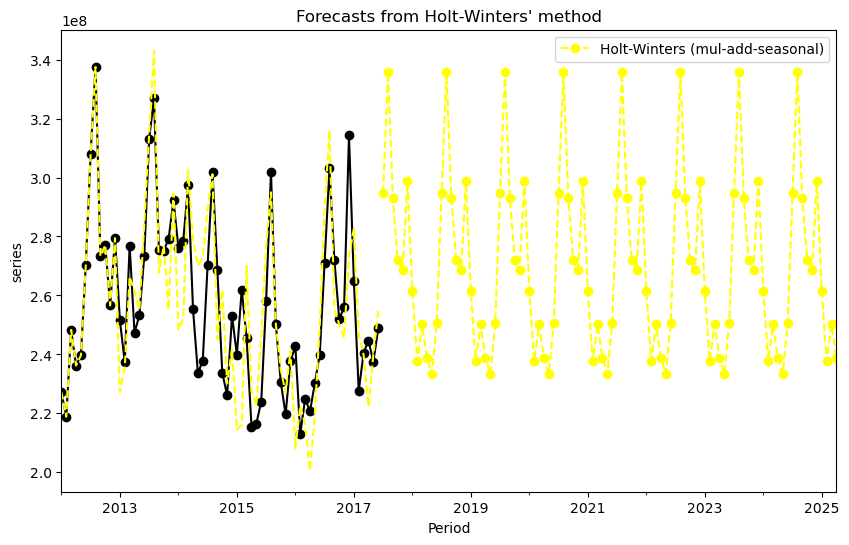

Total mul add True 16861389.017980516 0.04851287269362607 54278602.18763365 0.14984559121782082
Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


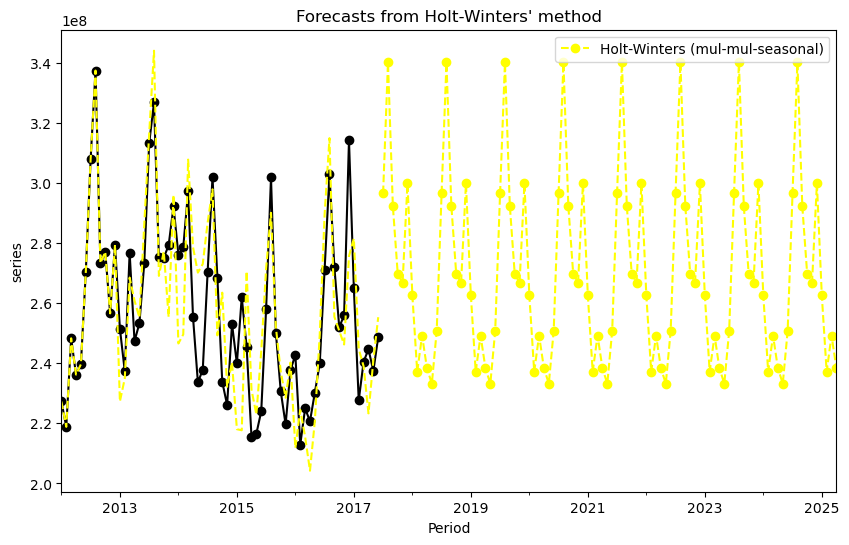

Total mul mul False 16473694.35993847 0.04823514747577167 54936793.058544055 0.1503263794295345
Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


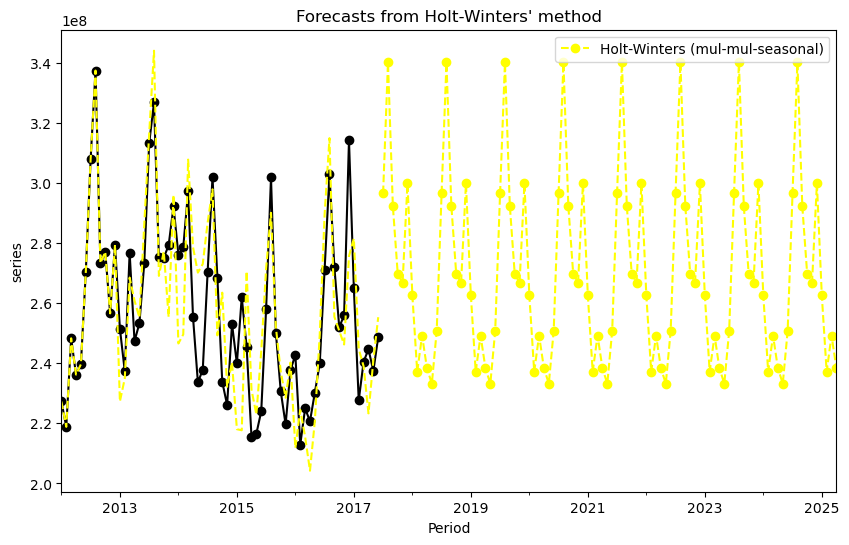

Total mul mul True 16473694.35993847 0.04823514747577167 54936793.058544055 0.1503263794295345
Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.


In [68]:
# i = 0
train_part = 0.5
df_uah2 = df_uah1.iloc[:int(len(df_uah1)*train_part)]
preds_len = len(df_uah1) - len(df_uah2)
preds_len = 94

for var_ in ["Total"]:
    for trend in ["add", "mul"]:
        for seas in ["add", "mul"]:
            for dampped_trend in [False, True]:
                y = df_uah2[var_].clip(lower=1, upper=400000000)
                predict_smoothing(y, i=i, x=None, prediction_len=preds_len, var_name=var_,
                                  trend=trend, seas=seas, damped_trend=dampped_trend)
                i += 1
                

In [69]:
scores.to_csv("/Users/Marta/Desktop/diploma/results/Holt_Winters_Smoothing_scores.csv")
scores

,Series,Trend,Seasonal,Damped trend,RMSE_train,MAPE_train,RMSE_test,MAPE_test,Cross validation sample
0,Total,add,add,False,16158856.609066,0.046672,56757780.95616,0.156354,0.6
1,Total,add,add,True,16158856.609066,0.046672,56757780.95616,0.156354,0.6
2,Total,add,mul,False,15906546.767655,0.04676,57334190.622737,0.158005,0.6
3,Total,add,mul,True,15906546.767655,0.04676,57334190.622737,0.158005,0.6
4,Total,mul,add,False,16158856.609066,0.046672,56757780.95616,0.156354,0.6
5,Total,mul,add,True,16158856.609066,0.046672,56757780.95616,0.156354,0.6
6,Total,mul,mul,False,15906546.767655,0.04676,57334190.622737,0.158005,0.6
7,Total,mul,mul,True,15906546.767655,0.04676,57334190.622737,0.158005,0.6
8,Total,add,add,False,24260124.724677,0.059468,55259588.056004,0.166108,0.85
9,Total,add,add,True,24260124.724677,0.059468,55259588.056004,0.166108,0.85


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency inform

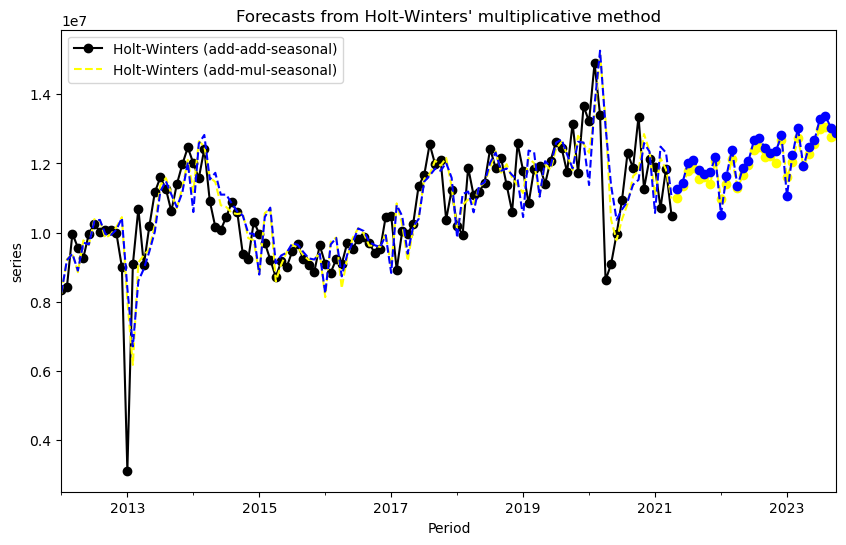

Figure 7.6: Forecasting using Holt-Winters method with both additive and multiplicative seasonality.
              Additive  Multiplicative  Additive Dam  Multiplica Dam
$\alpha$  7.121429e-01    5.353571e-01  7.121429e-01    5.353571e-01
$\beta$   1.000000e-04    1.000000e-04  1.000000e-04    1.000000e-04
$\phi$             NaN             NaN  9.900000e-01    9.900000e-01
$\gamma$  3.838095e-02    1.000000e-04  3.838095e-02    1.000000e-04
$l_0$     1.002362e+12    1.002362e+12  1.002362e+12    1.002362e+12
$b_0$     1.204109e+10    1.204109e+10  1.204109e+10    1.204109e+10
SSE       1.209742e+14    1.342801e+14  1.207724e+14    1.336990e+14


In [13]:
predict_smoothing(df_uah2["T1"], x=None, prediction_len=30)